In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


In [2]:
df = pd.read_csv("8_50_Startups.csv")
print("Dataset loaded successfully")
df.head()

Dataset loaded successfully


,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df = df.fillna(df.mean(numeric_only=True))
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])


In [4]:
le = LabelEncoder()
df['STATE'] = le.fit_transform(df['STATE'])

print("\n✅ Label Encoding Done!")



✅ Label Encoding Done!


In [5]:
X = df[['PROFIT']]

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("\n✅ Data Scaled Successfully!")


✅ Data Scaled Successfully!


In [8]:
Z = linkage(X_scaled, method='ward')


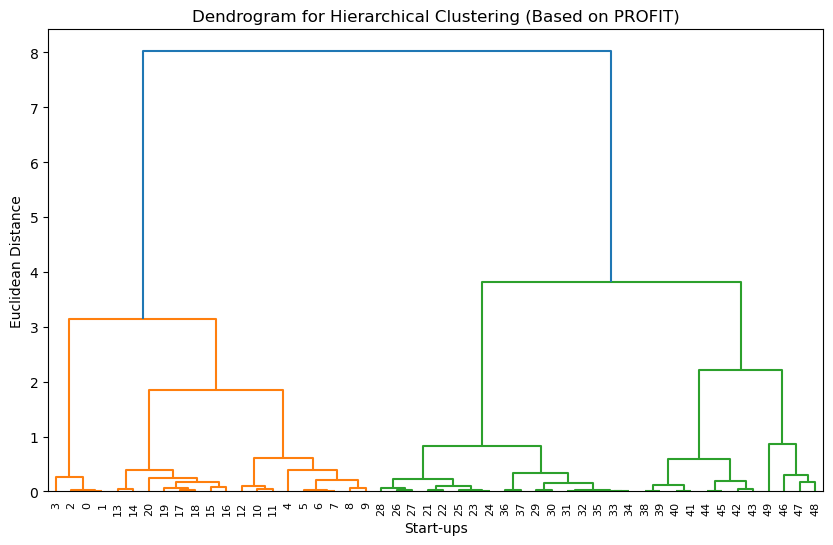

In [10]:
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering (Based on PROFIT)')
plt.xlabel('Start-ups')
plt.ylabel('Euclidean Distance')
plt.show()


In [11]:
clusters = fcluster(Z, t=3, criterion='maxclust')
df['Cluster'] = clusters

print("\n✅ Hierarchical Clustering Applied Successfully!")
print(df[['STATE', 'PROFIT', 'Cluster']].head())


✅ Hierarchical Clustering Applied Successfully!
   STATE     PROFIT  Cluster
0      2  192261.83        1
1      0  191792.06        1
2      1  191050.39        1
3      2  182901.99        1
4      1  166187.94        1


In [12]:
print("\nAverage Profit per Cluster:")
print(df.groupby('Cluster')['PROFIT'].mean())



Average Profit per Cluster:
Cluster
1    149605.103333
2    101580.121176
3     61005.227500
Name: PROFIT, dtype: float64


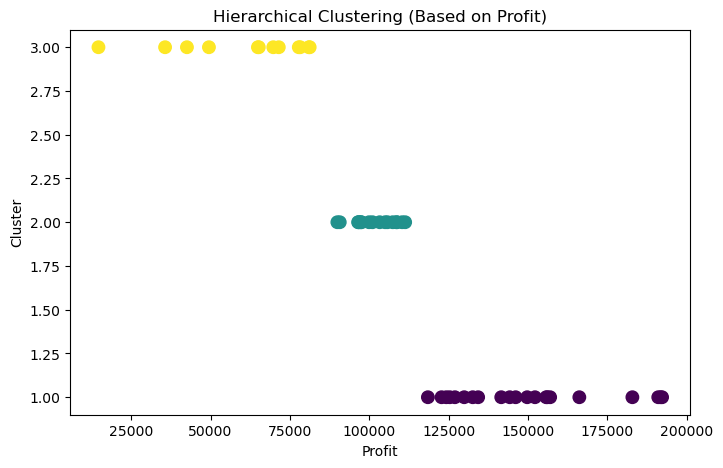

In [13]:
plt.figure(figsize=(8, 5))
plt.scatter(df['PROFIT'], df['Cluster'], c=df['Cluster'], cmap='viridis', s=80)
plt.xlabel('Profit')
plt.ylabel('Cluster')
plt.title('Hierarchical Clustering (Based on Profit)')
plt.show()